In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
%run Line.ipynb
%run Chart.ipynb
%run myutil.ipynb

p1_mean : [0.3162661369732219, 0.6863288195101646]
 p1_std : [0.2171447573067073, 0.21749112140613935]
p2_mean : [0.21069975147475836, 0.4916610017210584, 0.4916610017210584, 0.7839533392545167]
 p1_std : [0.17130548374861196, 0.19460864132689965, 0.19460864132689965, 0.16969031664327433]
p3_mean : [0.16199449704635094, 0.3944235498175606, 0.3944235498175606, 0.6134220651364535, 0.6134220651364535, 0.8469400303529424]
 p1_std : [0.13111370227771205, 0.1661808315287798, 0.1661808315287798, 0.16544878784768025, 0.16544878784768025, 0.12847632551465535]


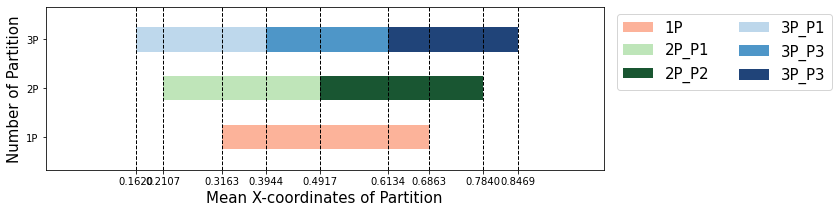

In [14]:

def p1(num):
    x_list = [[[],[]]]
    for i in range(num):
        l = Line(1, '1p', 5)
        x_list[0][0].append(min(l.x))
        x_list[0][1].append(max(l.x))
        
    #xl = np.mean(x_list[0])
    #xr = np.mean(x_list[1])
    
    ret = get_statistics(x_list)
    
    #print(f"xl : {xl}, xr : {xr}")
        
    return ret['mean'], ret['std']

def p2(num):
    x_list = [[[],[]],[[],[]]]
    for i in range(num):
        l = Line(2, '1p', 5)
        x_list[0][0].append(min(l.p_list[0].x)) #p1 xl
        x_list[0][1].append(max(l.p_list[0].x)) #p1 xr
        x_list[1][0].append(min(l.p_list[1].x)) #p2 xl
        x_list[1][1].append(max(l.p_list[1].x)) #p2 xr
        
    ret = get_statistics(x_list)
    
    #print(f"p1xl : {p1xl}, p1xr : {p1xr}")
    #print(f"p2xl : {p2xl}, p2xr : {p2xr}")
        
    return ret['mean'], ret['std']

def p3(num):
    x_list = [[[],[]],[[],[]],[[],[]]]
    for i in range(num):
        l = Line(3, '3p', 5)
        x_list[0][0].append(min(l.p_list[0].x)) #p1 xl
        x_list[0][1].append(max(l.p_list[0].x)) #p1 xr
        x_list[1][0].append(min(l.p_list[1].x)) #p2 xl
        x_list[1][1].append(max(l.p_list[1].x)) #p2 xr
        x_list[2][0].append(min(l.p_list[2].x)) #p3 xl
        x_list[2][1].append(max(l.p_list[2].x)) #p3 xr
    
    ret = get_statistics(x_list)
    
    #return p1xl, p1xr, p2xl, p2xr, p3xl, p3xr
    return ret['mean'], ret['std']

def get_statistics(x_list):
    ret = dict()
    ret['mean']=[]
    ret['std']=[]
    
    for xl,xr in x_list:
        ret['mean'].append(np.mean(xl))
        ret['mean'].append(np.mean(xr))
        ret['std'].append(np.std(xl))
        ret['std'].append(np.std(xr))  
        
    return ret

def get_color():
    colors = []
    colors.extend(plt.cm.Reds(np.linspace(0.3,1,1)))
    colors.extend(plt.cm.Greens(np.linspace(0.3,1,2)))
    colors.extend(plt.cm.Blues(np.linspace(0.3,1,3)))
    
    return colors

num = 1000
p1_mean, p1_std = p1(num)
p2_mean, p2_std = p2(num)
p3_mean, p3_std = p3(num)

print(f"p1_mean : {p1_mean}\n p1_std : {p1_std}")
print(f"p2_mean : {p2_mean}\n p1_std : {p2_std}")
print(f"p3_mean : {p3_mean}\n p1_std : {p3_std}")

#xticks = [0, 1]
xticks = []
xticks.extend(p1_mean)
xticks.extend(p2_mean)
xticks.extend(p3_mean)
#xticks=[xl, xr, p1xl_2p, p1xr_2p, p2xl_2p, p2xr_2p, p1xl_3p, p1xr_3p, p2xl_3p, p2xr_3p, p3xl_3p, p3xr_3p]
xticks = np.sort(list(set(xticks)))

height = 0.15
alpha = 0.9
key = ['1P', '2P_P1', '2P_P2', '3P_P1', '3P_P3', '3P_P3']
key2 = ['1P', '2P', '3P']
#y_start = [0.15, 0.35,0.45, 0.65,0.75,0.85]
y_start2 = [0.2, 0.5, 0.8]

colors = get_color()

# axes patches
patches = []
patches.append(Rectangle((p1_mean[0], y_start2[0]- height/2.0), p1_mean[1]-p1_mean[0], height, facecolor=colors[0], alpha=alpha))
patches.append(Rectangle((p2_mean[0], y_start2[1]- height/2.0), p2_mean[1]-p2_mean[0], height, facecolor=colors[1], alpha=alpha))
patches.append(Rectangle((p2_mean[2], y_start2[1]- height/2.0), p2_mean[3]-p2_mean[2], height, facecolor=colors[2], alpha=alpha))
patches.append(Rectangle((p3_mean[0], y_start2[2]- height/2.0), p3_mean[1]-p3_mean[0], height, facecolor=colors[3], alpha=alpha))
patches.append(Rectangle((p3_mean[2], y_start2[2]- height/2.0), p3_mean[3]-p3_mean[2], height, facecolor=colors[4], alpha=alpha))
patches.append(Rectangle((p3_mean[4], y_start2[2]- height/2.0), p3_mean[5]-p3_mean[4], height, facecolor=colors[5], alpha=alpha))

#for legend patch
c = [ Rectangle((0.5, 0.5), 1, 1, facecolor=color, alpha=alpha, linewidth=3) for color in colors]



fig, ax = plt.subplots(figsize=(10,3))
#print(f"xticks : {xticks}")
for xtick in xticks:
    ax.axvline(x=xtick, color='k', linewidth=1, linestyle='--')
    
plt.xticks(xticks)
plt.yticks(y_start2)
plt.xlabel('Mean X-coordinates of Partition', fontsize=15)
plt.ylabel('Number of Partition', fontsize=15)

ax.set_yticklabels(key2[0:len(y_start2)])
ax.legend(c,key,bbox_to_anchor=(1.01, 1.0), loc='upper left', ncol=2, facecolor='white', fontsize=15)
for patch in patches:
    ax.add_patch(patch)
pc = PatchCollection(patches, facecolor='r', alpha=0.5, edgecolor='k')
plt.savefig('partition_mean_x_coord.png', dpi=300, bbox_inches='tight')


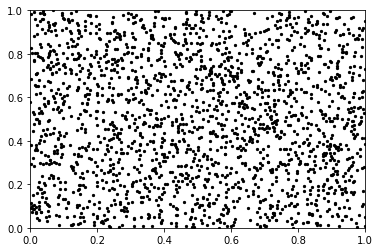

In [18]:
inits=[[],[]]
num = 1000
for i in range(num):
    l = Line(1, '1p', 5)
    inits[0].append(l.init_x)
    inits[1].append(l.init_y)
    
#fig, ax = plt.subplots(figsize=(10,3))
plt.scatter(inits[0], inits[1],color='k',s=5)
#plt.xlabel('X', fontsize=15)
#plt.ylabel('Y', fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
#plt.legend(['Initial Point'],bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=15)
plt.savefig('initial_points.png', dpi=300, bbox_inches='tight')

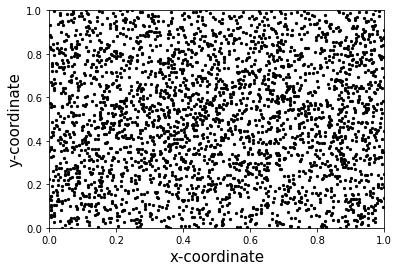

In [14]:
inits=[[],[]]
num = 1000
for i in range(num):
    l = Line(2, '1p', 5)
    inits[0].append(l.init_x)
    inits[1].append(l.init_y)
    
#fig, ax = plt.subplots(figsize=(10,3))
plt.scatter(inits[0], inits[1],color='k',s=5)
plt.xlabel('x-coordinate', fontsize=15)
plt.ylabel('y-coordinate', fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
#plt.legend(['Initial Point'],bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=15)
plt.savefig('initial_points.png', dpi=300, bbox_inches='tight')

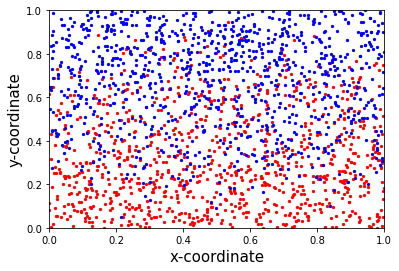

In [15]:
lminx = []
lminy = []
lmaxx = []
lmaxy = []
num = 1000
for i in range(num):
    c = Chart(1,1)
    lminx.append(c.l1_min[0])
    lminy.append(c.l1_min[1])
    lmaxx.append(c.l1_max[0])
    lmaxy.append(c.l1_max[1])
    
plt.scatter(lminx,lminy ,color='r',s=5)
plt.scatter(lmaxx,lmaxy,color='b',s=5)
plt.xlabel('x-coordinate', fontsize=15)
plt.ylabel('y-coordinate', fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
#plt.legend(['Minimum Point','Maximum Point'],bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=15)
plt.savefig('minmax_points.png', dpi=300, bbox_inches='tight')